<a href="https://colab.research.google.com/github/14Fabyzz/prediccion-tarifa-energia/blob/main/EnergyProyect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DatasetTarifaEnergia

In [51]:
#paso 1: Importar libreria
#from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Paso 3: Leer el archivo CSV usando pandas
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/bootcamp/datosedepDf.csv")
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Año,Mes,Clase de Servicio,Todo Consumo
0,2014.0,Enero,Estrato1,360.03958
1,2014.0,Enero,Estrato2,360.03958
2,2014.0,Enero,Estrato3,360.03958
3,2014.0,Enero,Estrato4,360.03958
4,2014.0,Enero,Estrato5,432.04750
5,2014.0,Enero,Estrato6,432.04750
6,2014.0,Enero,Comercial / Industrial,432.04750
7,2014.0,Enero,Oficial / Especial,360.03958
8,2014.0,Enero,Provisional,432.04750
9,2014.0,Febrero,Estrato1,360.03958


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Año                1230 non-null   float64
 1   Mes                1231 non-null   object 
 2   Clase de Servicio  1231 non-null   object 
 3   Todo Consumo       1230 non-null   float64
dtypes: float64(2), object(2)
memory usage: 38.7+ KB


In [53]:
# Estadísticas básicas
#print(df.describe())

# Verificar valores nulos
print(df.isnull().sum())

#borrar los nulos
df = df.dropna()


Año                  5
Mes                  4
Clase de Servicio    4
Todo Consumo         5
dtype: int64


In [54]:
df = df.rename(columns={'Todo Consumo': 'Tarifa_kWh'})


#año a entero
df['Año'] = df['Año'].astype(int)

# Crear columna de Número de Mes
mes_a_numero = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

df['Numero_Mes'] = df['Mes'].map(mes_a_numero)


In [55]:
# 1. Limpieza inicial del texto
clase_clean = df['Clase de Servicio'].str.lower().str.strip()

# 2. Diccionario de mapeo
service_map = {
    'estrato1': 1,
    'estrato2': 2,
    'estrato3': 3,
    'estrato4': 4,
    'estrato5': 5,
    'estrato6': 6,
    'comercial / industrial': 7,
    'oficial / especial': 8,
    'provisional': 9
}

# 3. Aplicar el mapeo
df['numero_clase_servicio'] = clase_clean.map(service_map)
print(df.isnull().sum())

Año                      0
Mes                      0
Clase de Servicio        0
Tarifa_kWh               0
Numero_Mes               0
numero_clase_servicio    0
dtype: int64


In [56]:
print(df.groupby('Año')['Tarifa_kWh'].mean())


Año
2014     414.387502
2015     436.824915
2016     534.373762
2017     533.991569
2018     555.713611
2019     582.384093
2020     634.177326
2021     666.664927
2022     764.528187
2023     894.731430
2024    1058.748836
2025    1073.990889
Name: Tarifa_kWh, dtype: float64


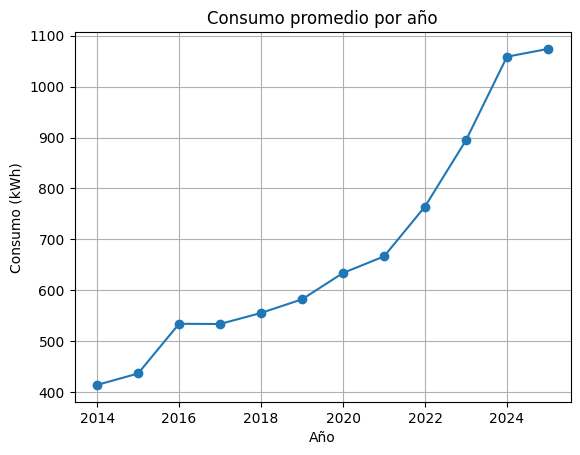

In [57]:
import matplotlib.pyplot as plt

# Crear un gráfico de líneas para cada año
# Agrupar por año y sacar el promedio del consumo
df.groupby('Año')['Tarifa_kWh'].mean().plot(marker='o', title='Consumo promedio por año')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.show()


In [58]:
display(df)

,Año,Mes,Clase de Servicio,Tarifa_kWh,Numero_Mes,numero_clase_servicio
0,2014,Enero,Estrato1,360.03958,1,1
1,2014,Enero,Estrato2,360.03958,1,2
2,2014,Enero,Estrato3,360.03958,1,3
3,2014,Enero,Estrato4,360.03958,1,4
4,2014,Enero,Estrato5,432.04750,1,5
...,...,...,...,...,...,...
1226,2025,Mayo,Estrato5,1161.95000,5,5
1227,2025,Mayo,Estrato6,1161.95000,5,6
1228,2025,Mayo,Comercial / Industrial,1161.95000,5,7
1229,2025,Mayo,Oficial / Especial,968.29000,5,8


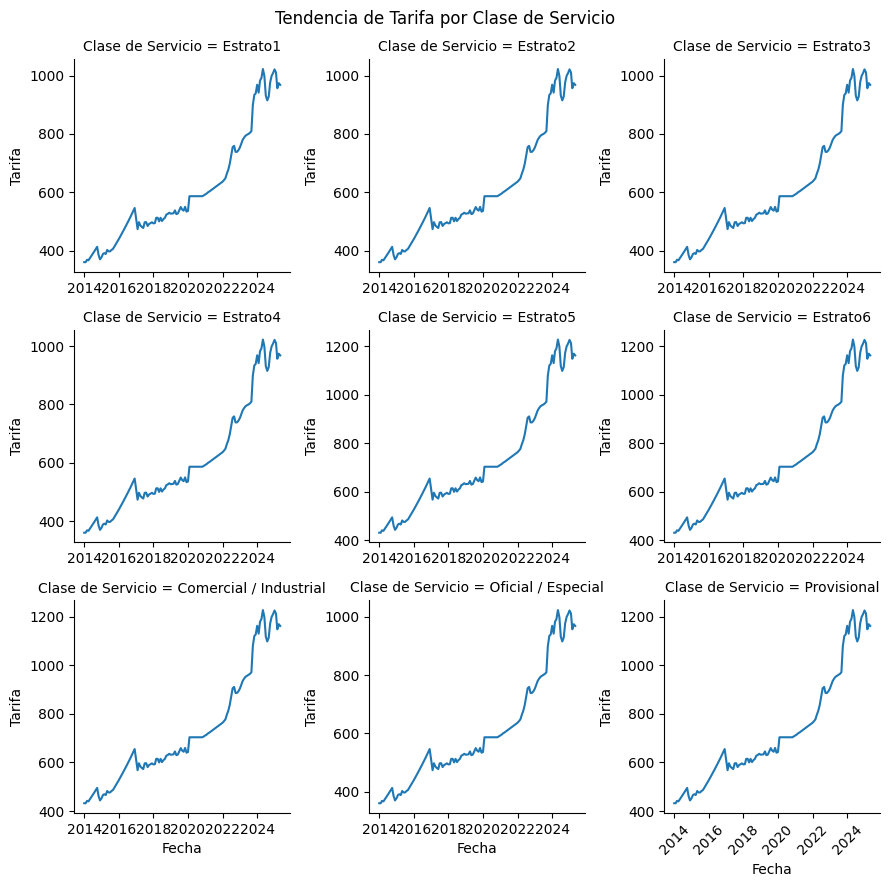

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas to use pd.to_datetime


# Creamos la columna 'Fecha' combinando 'Año' y 'Numero_Mes'
# También necesitas un día. Como los datos parecen ser mensuales, podemos usar el primer día del mes.

df['Fecha'] = pd.to_datetime(df['Año'].astype(str) + '-' + df['Numero_Mes'].astype(str) + '-01')


# Ordenamos el DataFrame por la fecha

df_sorted = df.sort_values('Fecha')

# Creamos el FacetGrid
# FacetGrid  crear múltiples gráficos (subplots) organizados en una cuadrícula

g = sns.FacetGrid(df_sorted, col='Clase de Servicio', col_wrap=3, height=3, sharey=False)

# Asignamos el gráfico de líneas al FacetGrid
g.map_dataframe(sns.lineplot, x='Fecha', y='Tarifa_kWh')

# Personalizamos los ejes
for ax in g.axes.ravel():
    ax.tick_params(labelbottom=True)
    ax.set_xlabel('Fecha') # Set xlabel
    ax.set_ylabel('Tarifa') # Set ylabel

# Adjust layout and add a title
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Tendencia de Tarifa por Clase de Servicio')

# Rotamos las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Aseguramos un diseño ajustado
plt.tight_layout()

# Show
plt.show()

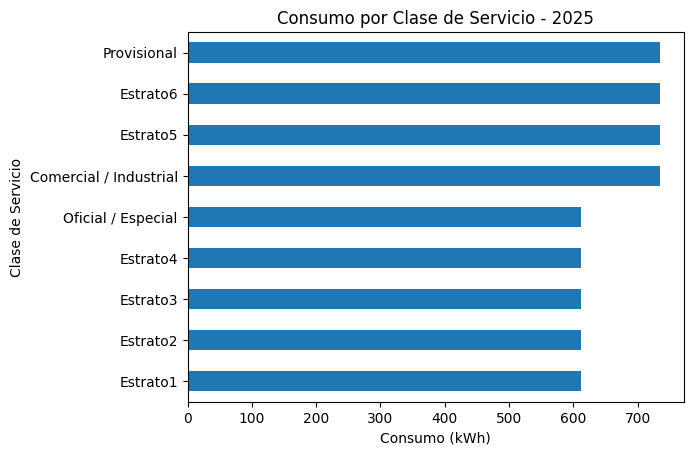

In [60]:
#. Consumo por clase de servicio en un año específico
df[df['Año'] == 2021].groupby('Clase de Servicio')['Tarifa_kWh'].mean().sort_values().plot(kind='barh', title='Consumo por Clase de Servicio - 2025')
plt.xlabel('Consumo (kWh)')
plt.show()

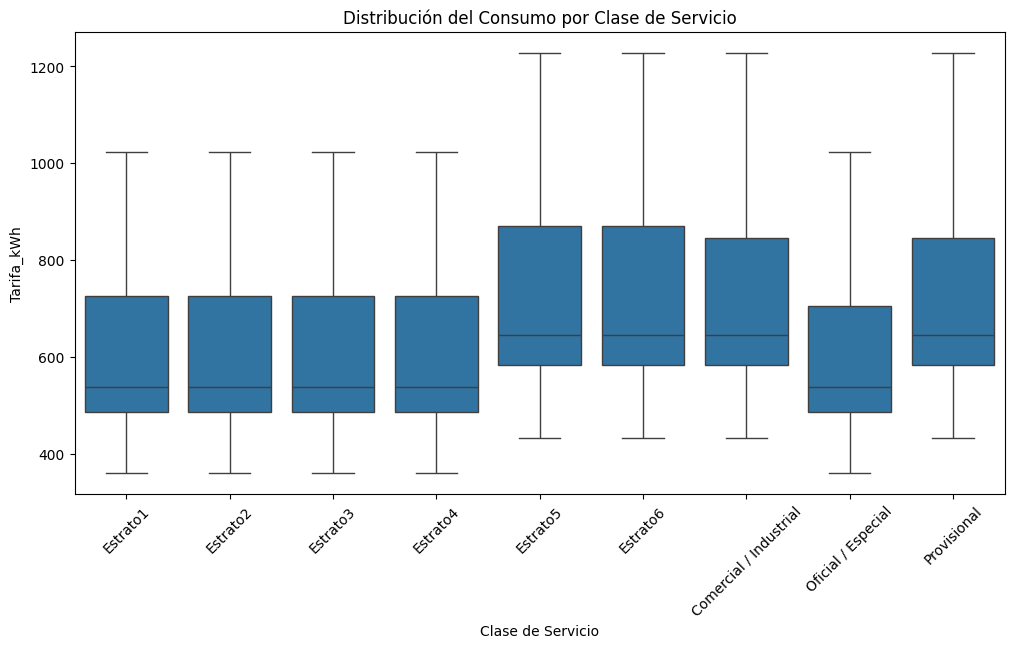

In [61]:
# Boxplot de consumo mensual por tipo de servicio
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Clase de Servicio', y='Tarifa_kWh')
plt.xticks(rotation=45)
plt.title('Distribución del Consumo por Clase de Servicio')
plt.show()

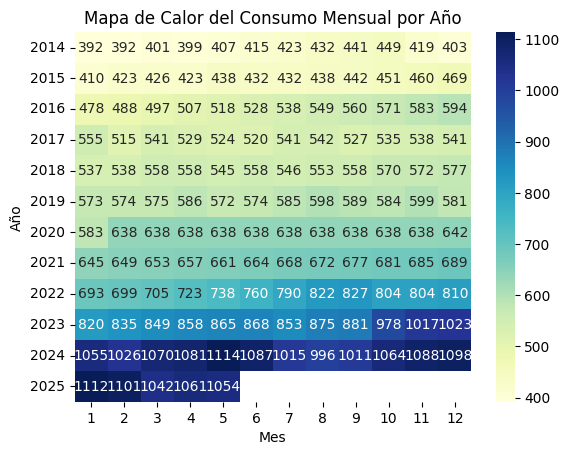

In [62]:
# Calorimetría (heatmap) del consumo por mes y año
pivot = df.pivot_table(values='Tarifa_kWh', index='Año', columns='Numero_Mes', aggfunc='mean')
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Mapa de Calor del Consumo Mensual por Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.show()

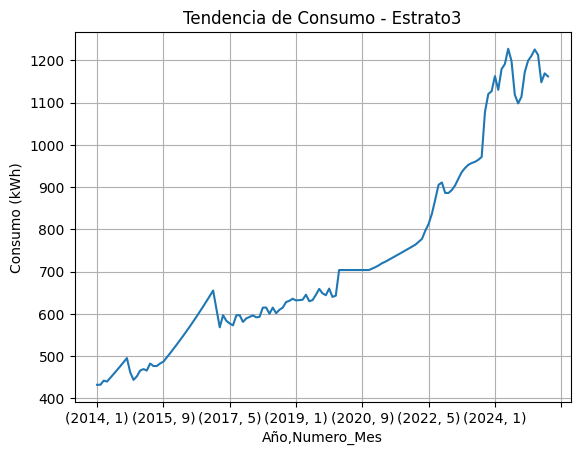

In [63]:
#Tendencia de consumo para un servicio específico
df[df['Clase de Servicio'] == 'Estrato5'].groupby(['Año', 'Numero_Mes'])['Tarifa_kWh'].mean().plot(title='Tendencia de Consumo - Estrato3')
plt.ylabel('Consumo (kWh)')
plt.grid(True)
plt.show()

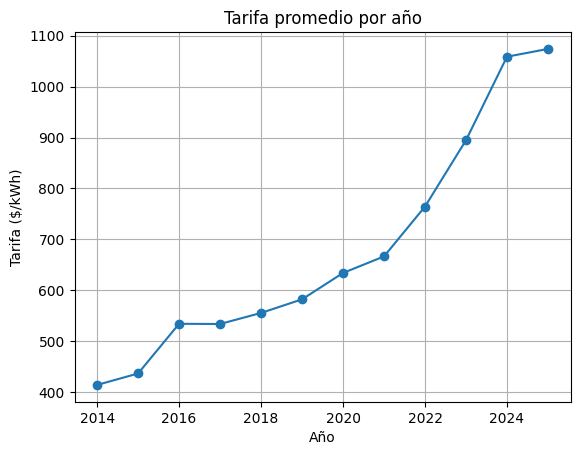

In [64]:
# Promedio de tarifa por año
df.groupby('Año')['Tarifa_kWh'].mean().plot(marker='o', title='Tarifa promedio por año')
plt.ylabel('Tarifa ($/kWh)')
plt.grid(True)
plt.show()

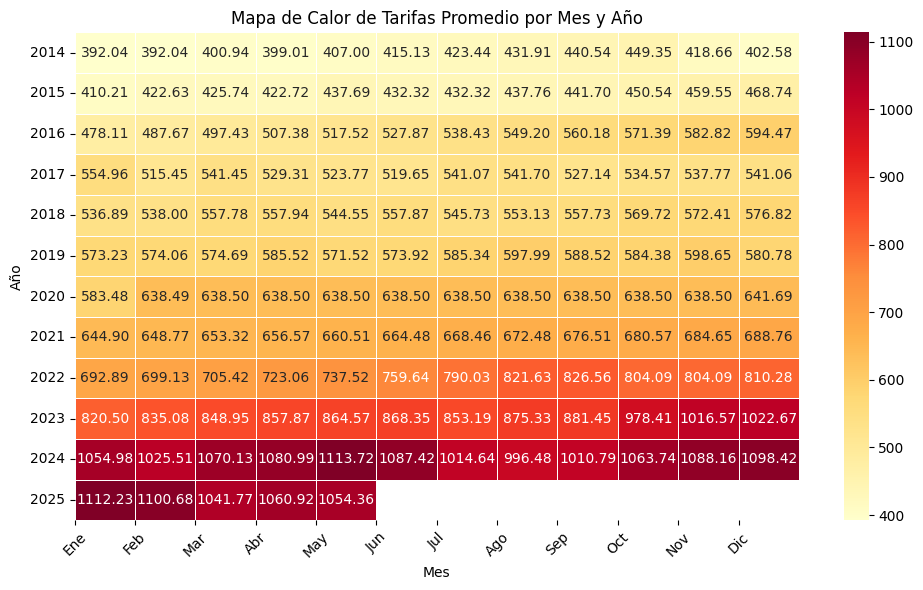

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear tabla dinámica (pivot table)
pivot = df.pivot_table(
    values='Tarifa_kWh',
    index='Año',
    columns='Numero_Mes',
    aggfunc='mean'
)

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)

# Etiquetas y título
plt.title('Mapa de Calor de Tarifas Promedio por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Año')
plt.xticks(ticks=range(12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


REGRESION LINEAL

In [66]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Variables predictoras (X) y objetivo (y)
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir tarifas
y_pred = modelo.predict(X_test)

# Evaluar el modelo
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² (coef. de determinación): {r2:.4f}")
print(f"RMSE (error cuadrático medio): {rmse:.2f} $/kWh")

# Mostrar coeficientes
coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
print("\nCoeficientes del modelo:")
print(coef)

R² (coef. de determinación): 0.8154
RMSE (error cuadrático medio): 90.65 $/kWh

Coeficientes del modelo:
                Variable  Coeficiente
0                    Año    57.799950
1             Numero_Mes     3.689908
2  numero_clase_servicio    14.349998


In [25]:
pip install gradio


In [26]:
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Cargar y preparar datos ---
df = df.rename(columns={'Todo Consumo': 'Tarifa_kWh'})

# Codificar clase de servicio
df['numero_clase_servicio'] = df['Clase de Servicio'].astype('category').cat.codes

# Guardar mapeo clase <-> número
mapa_servicio = dict(enumerate(df['Clase de Servicio'].astype('category').cat.categories))
# También al revés (nombre → número)
servicio_a_codigo = {v: k for k, v in mapa_servicio.items()}

# Variables predictoras y objetivo
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']

# Entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# --- Función de predicción ---
def predecir_tarifa(año, mes, clase_nombre):
    clase_codigo = servicio_a_codigo[clase_nombre]  # convertir nombre a número
    entrada = pd.DataFrame([[año, mes, clase_codigo]], columns=['Año', 'Numero_Mes', 'numero_clase_servicio'])
    prediccion = modelo.predict(entrada)[0]
    return f"Tarifa estimada: ${prediccion:.2f} por kWh"

# --- Crear interfaz con dropdown de clases ---
interfaz = gr.Interface(
    fn=predecir_tarifa,
    inputs=[
        gr.Slider(2014, 2025, step=1, label="Año"),
        gr.Slider(1, 12, step=1, label="Mes"),
        gr.Dropdown(choices=list(servicio_a_codigo.keys()), label="Clase de Servicio")
    ],
    outputs="text",
    title="Predicción de Tarifa Eléctrica en Colombia",
    description="Selecciona el año, mes y clase de servicio para predecir la tarifa regulada en $/kWh"
)

interfaz.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://598ee536a0ed9a0d7b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


#Produccion de energia de panels

In [ ]:
# cargar archivo exel en colab
#paso 1: Importar libreria
#from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

# Paso 3: Leer el archivo CSV usando pandas
import pandas as pd
df_paneles = pd.read_excel("/content/drive/MyDrive/bootcamp/ProductDatabaseSample.xlsx")
df_paneles.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ENF ID,Region,Series Name,Series Power Range (Wp),Model Name,Warranty Years,"Maximum Power, Pmax (W) At STC","Voltage at Maximum Power, Vmpp (V) At STC","Open Circuit Voltage, Voc (V) At STC","Short Circuit Current, Isc (A) At STC",...,Maximum System Voltage (V),Height (mm),Width (mm),Depth (mm),Weight (kg),Type,Technology,Company Contact Details,Series ID,Tipo_panel
0,329,Singapore,REC Alpha Pro M 600-640W,600 ~ 640,REC600AA Pro M,25.0,600,36.00,44.20,17.65,...,1500.0,2175,1305,30,32.5,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,65006,Panel comun
1,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC590AA Pro MG,30.0,590,35.80,44.10,17.34,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
2,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC600AA Pro MG,30.0,600,36.00,44.20,17.45,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
3,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC610AA Pro MG,30.0,610,36.30,44.40,17.56,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
4,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC620AA Pro MG,30.0,620,36.60,44.60,17.67,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
5,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC630AA Pro MG,30.0,630,36.80,44.70,17.78,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
6,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC640AA Pro MG,30.0,640,37.10,44.90,17.89,...,1500.0,2172,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun
7,2236,China,DeepBlue 4.0 Pro JAM60D42-520-545/LB,520 ~ 545,JAM60D42-520/LB,12.0,520,36.37,43.53,15.16,...,1500.0,2063,1134,30,28.8,Monocrystalline,"Bifacial,N-type",https://www.enfsolar.com/ja-solar,67025,Panel comun
8,2236,China,DeepBlue 4.0 Pro JAM60D42-520-545/LB,520 ~ 545,JAM60D42-525/LB,12.0,525,36.59,43.73,15.21,...,1500.0,2063,1134,30,28.8,Monocrystalline,"Bifacial,N-type",https://www.enfsolar.com/ja-solar,67025,Panel comun
9,2236,China,DeepBlue 4.0 Pro JAM60D42-520-545/LB,520 ~ 545,JAM60D42-530/LB,12.0,530,36.81,43.93,15.26,...,1500.0,2063,1134,30,28.8,Monocrystalline,"Bifacial,N-type",https://www.enfsolar.com/ja-solar,67025,Panel comun


In [ ]:
# Renombrar columnas para consistencia
df_paneles.columns = df_paneles.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(',', '').str.replace('(', '').str.replace(')', '')

In [ ]:
# Identificar columnas con valores faltantes
missing_values = df_paneles.isnull().sum()
missing_values

,0
enf_id,0
region,0
series_name,0
series_power_range_wp,0
model_name,0
warranty_years,6
maximum_power_pmax_w_at_stc,0
voltage_at_maximum_power_vmpp_v_at_stc,0
open_circuit_voltage_voc_v_at_stc,0
short_circuit_current_isc_a_at_stc,0


In [ ]:
# Extraer valores numéricos de columnas como "series_power_range_wp"
df_paneles['power_min'] = df_paneles['series_power_range_wp'].str.extract(r'(\d+) ~ \d+').astype(float)
df_paneles['power_max'] = df_paneles['series_power_range_wp'].str.extract(r'\d+ ~ (\d+)').astype(float)

# Limpiar columnas con unidades mezcladas
df_paneles['maximum_power_pmax_w_at_stc'] = df_paneles['maximum_power_pmax_w_at_stc'].astype(float)

In [ ]:
# Eliminar registros duplicados exactos
df_paneles = df_paneles.drop_duplicates()

In [ ]:
df_paneles

,enf_id,region,series_name,series_power_range_wp,model_name,warranty_years,maximum_power_pmax_w_at_stc,voltage_at_maximum_power_vmpp_v_at_stc,open_circuit_voltage_voc_v_at_stc,short_circuit_current_isc_a_at_stc,...,width_mm,depth_mm,weight_kg,type,technology,company_contact_details,series_id,tipo_panel,power_min,power_max
0,329,Singapore,REC Alpha Pro M 600-640W,600 ~ 640,REC600AA Pro M,25.0,600.0,36.00,44.20,17.65,...,1305,30,32.5,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,65006,Panel comun,600.0,640.0
1,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC590AA Pro MG,30.0,590.0,35.80,44.10,17.34,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
2,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC600AA Pro MG,30.0,600.0,36.00,44.20,17.45,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
3,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC610AA Pro MG,30.0,610.0,36.30,44.40,17.56,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
4,329,Singapore,REC AlphA Pro MG 590-640W,590 ~ 640,REC620AA Pro MG,30.0,620.0,36.60,44.60,17.67,...,1305,30,36.8,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/rec-solar,67056,Panel comun,590.0,640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,24065,Netherlands,MHI Series,370 ~ 380,S1.MHI365,12.0,365.0,33.86,40.38,11.26,...,1038,35,20.0,NaN,PERC,https://www.enfsolar.com/autarco,46343,Panel comun,370.0,380.0
100,2500,Spain,Onyx Solar Glass-Glass,100 ~ 150,OS-GG-130W,10.0,130.0,28.50,34.20,4.80,...,1000,6,18.0,Thin Film (CIGS),"Bifacial, Semi-Transparent",https://www.onyxsolar.com,Nuevo,tipo ventana,100.0,150.0
101,25001,Spain,Onyx Solar PVB Laminated,80 ~ 120,OS-PVB-100W,10.0,100.0,26.80,32.50,3.90,...,800,8,15.0,Thin Film (CIGS),Building-Integrated (BIPV),https://www.onyxsolar.com,Nuevo,tipo ventana,80.0,120.0
102,25002,USA,UE Power™ ClearView,50 ~ 100,UE-CV-80W,15.0,80.0,24.00,30.50,3.50,...,900,6,12.0,Thin Film (OPV),"Transparent, BIPV",https://ubiquitous.energy,Nuevo,tipo ventana,50.0,100.0


In [ ]:
#paneles_Fotovoltaicos_potentes

# Filtrar solo los paneles tipo "común" (nota: en el dataset original aparece como "Panel comun")
paneles_comunes = df_paneles[df_paneles['tipo_panel'] == 'Panel comun']

# Ordenar por potencia máxima descendente y seleccionar los 4 primeros
top_4_paneles = paneles_comunes.sort_values(by='power_max', ascending=False).head(4)

# Seleccionar columnas relevantes para mostrar
columnas_relevantes = [
    'model_name',
    'series_name',
    'maximum_power_pmax_w_at_stc',
    'panel_efficiency_%_at_stc',
    'type',
    'technology',
    'company_contact_details'
]

paneles_Fotovoltaicos_potentes = top_4_paneles[columnas_relevantes]
paneles_Fotovoltaicos_potentes


,model_name,series_name,maximum_power_pmax_w_at_stc,panel_efficiency_%_at_stc,type,technology,company_contact_details
42,GDT132A-705,GDT132A-680-720W,705.0,22.70,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy
41,GDT132A-700,GDT132A-680-720W,700.0,22.53,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy
43,GDT132A-710,GDT132A-680-720W,710.0,22.86,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy
40,GDT132A-695,GDT132A-680-720W,695.0,22.37,Monocrystalline,"Bifacial,HJT",https://www.enfsolar.com/spic-new-energy


In [ ]:
#paneles_tipo_ventana_potentes
# Filtrar solo los paneles tipo "común" (nota: en el dataset original aparece como "Panel comun")
paneles_comunes = df_paneles[df_paneles['tipo_panel'] == 'tipo ventana']

# Ordenar por potencia máxima descendente y seleccionar los 4 primeros
top_4_paneles = paneles_comunes.sort_values(by='power_max', ascending=False).head(4)

# Seleccionar columnas relevantes para mostrar
columnas_relevantes = [
    'model_name',
    'series_name',
    'maximum_power_pmax_w_at_stc',
    'panel_efficiency_%_at_stc',
    'type',
    'technology',
    'company_contact_details'
]

paneles_tipo_ventana_potentes = top_4_paneles[columnas_relevantes]
paneles_tipo_ventana_potentes


,model_name,series_name,maximum_power_pmax_w_at_stc,panel_efficiency_%_at_stc,type,technology,company_contact_details
100,OS-GG-130W,Onyx Solar Glass-Glass,130.0,12.5,Thin Film (CIGS),"Bifacial, Semi-Transparent",https://www.onyxsolar.com
101,OS-PVB-100W,Onyx Solar PVB Laminated,100.0,10.8,Thin Film (CIGS),Building-Integrated (BIPV),https://www.onyxsolar.com
102,UE-CV-80W,UE Power™ ClearView,80.0,8.5,Thin Film (OPV),"Transparent, BIPV",https://ubiquitous.energy
103,UE-W-50W,UE Power™ Window,50.0,6.0,Thin Film (OPV),Ultra-Transparent,https://ubiquitous.energy


In [ ]:
import pandas as pd

# Definición de regiones y HSP (Horas Sol Pico)
regiones_colombia = {
    'Caribe': 5.5,
    'Andina': 5.0,
    'Pacífica': 4.1,
    'Orinoquía': 5.0,
    'Amazonía': 4.3
}

# Datos de los paneles (extraídos de los dataframes ya creados)
paneles = []

# Agregar paneles tipo ventana
for index, row in paneles_tipo_ventana_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'ventana'
    })

# Agregar paneles tradicionales
for index, row in paneles_Fotovoltaicos_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'tradicional'
    })


# Función de cálculo
def calcular_produccion(pmax, hsp, perdidas=0.20):
    diario = (pmax/1000) * hsp * (1-perdidas)
    anual = diario * 365
    mensual = anual / 12  # Cálculo de producción mensual
    return round(diario, 2), round(anual, 2), round(mensual, 2)

# Generar resultados
resultados = []
for panel in paneles:
    for region, hsp in regiones_colombia.items():
        diario, anual, mensual = calcular_produccion(panel['pmax'], hsp)
        resultados.append({
            'Modelo': panel['model_name'],
            'Tipo': panel['type'],
            'Categoría': panel['category'],
            'Región': region,
            'Potencia (W)': panel['pmax'],
            'Producción diaria (kWh)': diario,
            'Producción mensual (kWh)': mensual,  # Nueva columna
            'Producción anual (kWh)': anual
        })
# Crear DataFrame
df_resultados = pd.DataFrame(resultados)
zona_andina = df_resultados[df_resultados['Región'] == 'Andina']
zona_andina

,Modelo,Tipo,Categoría,Región,Potencia (W),Producción diaria (kWh),Producción mensual (kWh),Producción anual (kWh)
1,OS-GG-130W,Thin Film (CIGS),ventana,Andina,130.0,0.52,15.82,189.8
6,OS-PVB-100W,Thin Film (CIGS),ventana,Andina,100.0,0.40,12.17,146.0
11,UE-CV-80W,Thin Film (OPV),ventana,Andina,80.0,0.32,9.73,116.8
16,UE-W-50W,Thin Film (OPV),ventana,Andina,50.0,0.20,6.08,73.0
21,GDT132A-705,Monocrystalline,tradicional,Andina,705.0,2.82,85.78,1029.3
26,GDT132A-700,Monocrystalline,tradicional,Andina,700.0,2.80,85.17,1022.0
31,GDT132A-710,Monocrystalline,tradicional,Andina,710.0,2.84,86.38,1036.6
36,GDT132A-695,Monocrystalline,tradicional,Andina,695.0,2.78,84.56,1014.7


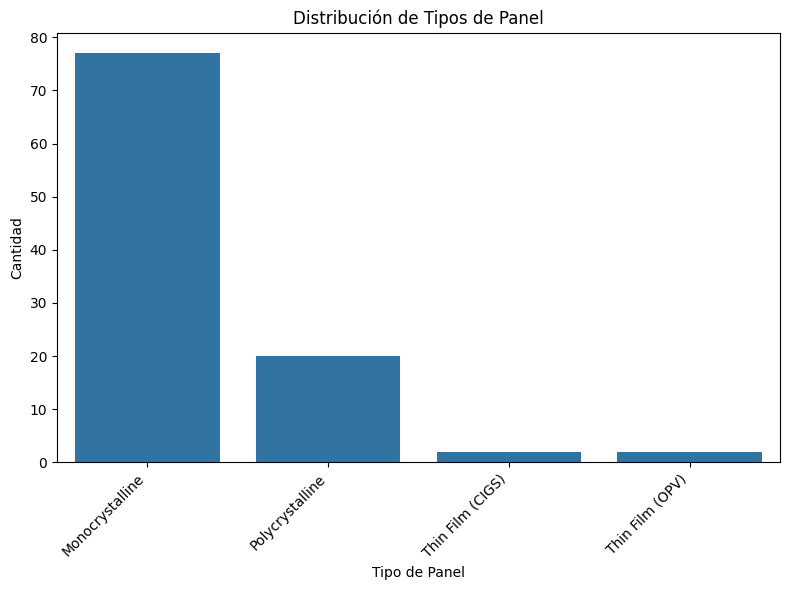

In [ ]:
#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Distribución de Tipos de Panel
plt.figure(figsize=(8, 6))
sns.countplot(data=df_paneles, x='type')
plt.title('Distribución de Tipos de Panel')
plt.xlabel('Tipo de Panel')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


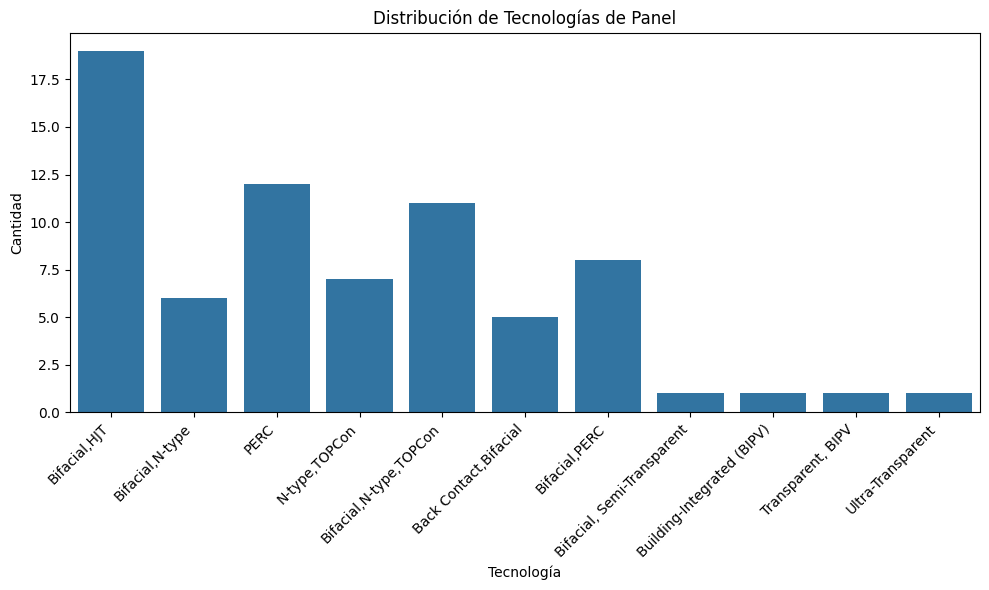

In [ ]:
# 2. Distribución de Tecnologías de Panel
plt.figure(figsize=(10, 6))
sns.countplot(data=df_paneles, x='technology')
plt.title('Distribución de Tecnologías de Panel')
plt.xlabel('Tecnología')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


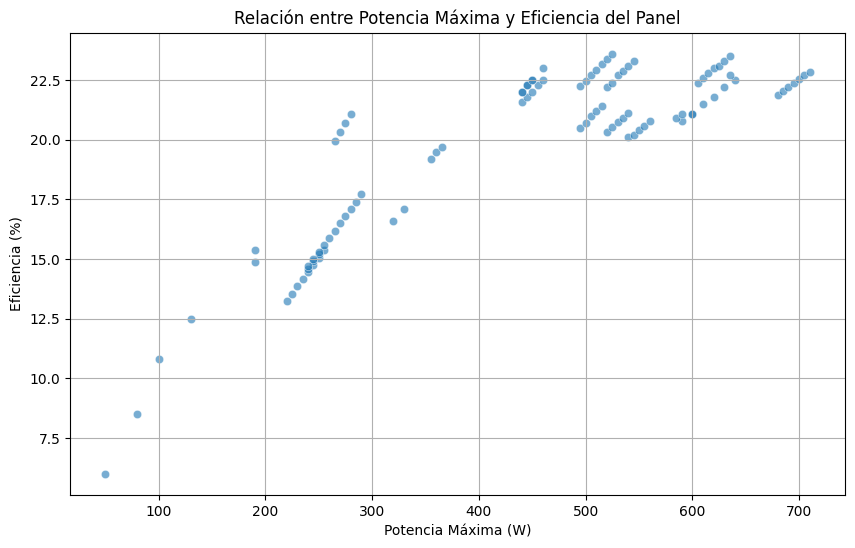

In [ ]:
# 3. Relación entre Potencia Máxima y Eficiencia del Panel
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_paneles, x='maximum_power_pmax_w_at_stc', y='panel_efficiency_%_at_stc', alpha=0.6)
plt.title('Relación entre Potencia Máxima y Eficiencia del Panel')
plt.xlabel('Potencia Máxima (W)')
plt.ylabel('Eficiencia (%)')
plt.grid(True)
plt.show()


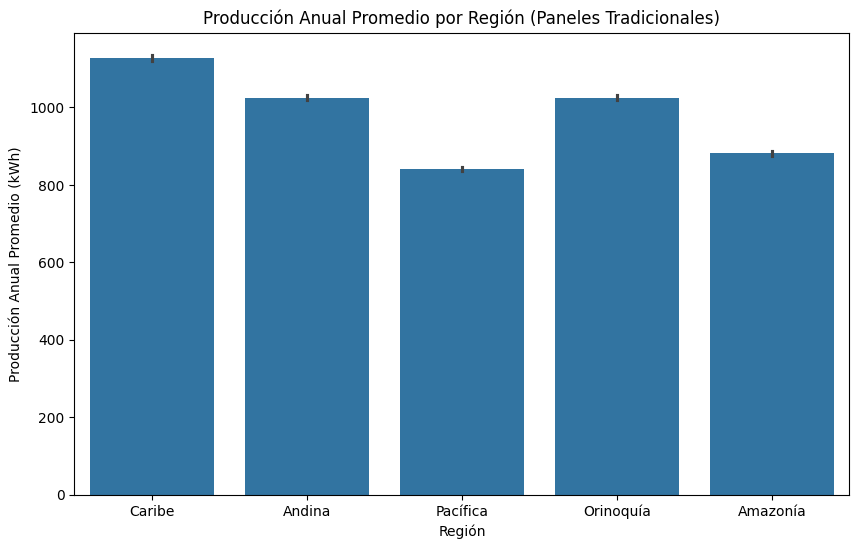

In [ ]:

# 4. Producción Anual Promedio por Región para Paneles Tradicionales
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados[df_resultados['Categoría'] == 'tradicional'], x='Región', y='Producción anual (kWh)')
plt.title('Producción Anual Promedio por Región (Paneles Tradicionales)')
plt.xlabel('Región')
plt.ylabel('Producción Anual Promedio (kWh)')
plt.show()

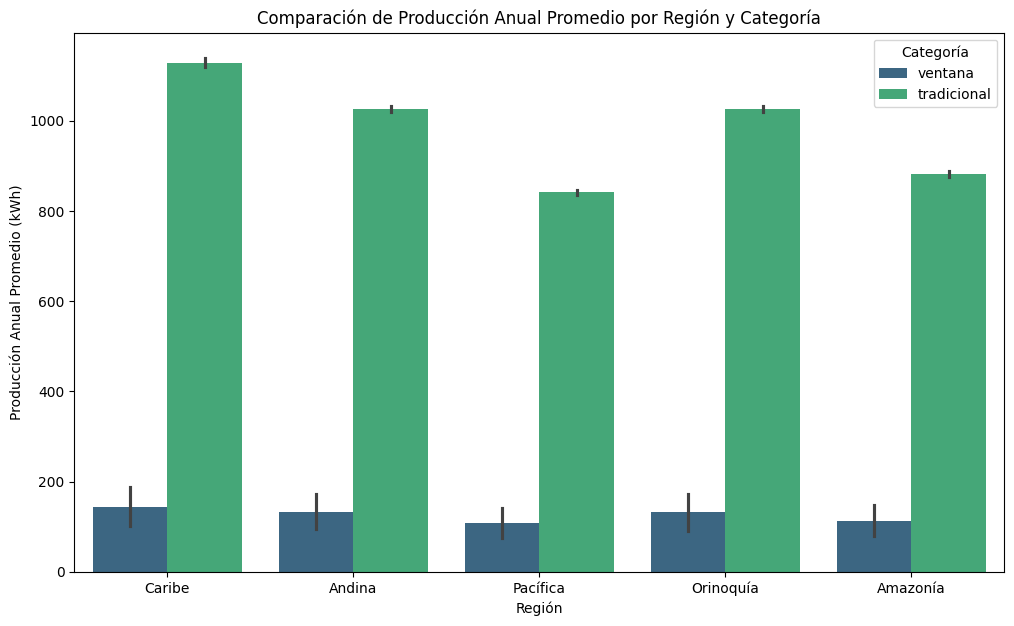

In [ ]:
# 5. Comparación de Producción Anual Promedio entre Categorías de Panel por Región
plt.figure(figsize=(12, 7))
sns.barplot(data=df_resultados, x='Región', y='Producción anual (kWh)', hue='Categoría', palette='viridis')
plt.title('Comparación de Producción Anual Promedio por Región y Categoría')
plt.xlabel('Región')
plt.ylabel('Producción Anual Promedio (kWh)')
plt.legend(title='Categoría')
plt.show()

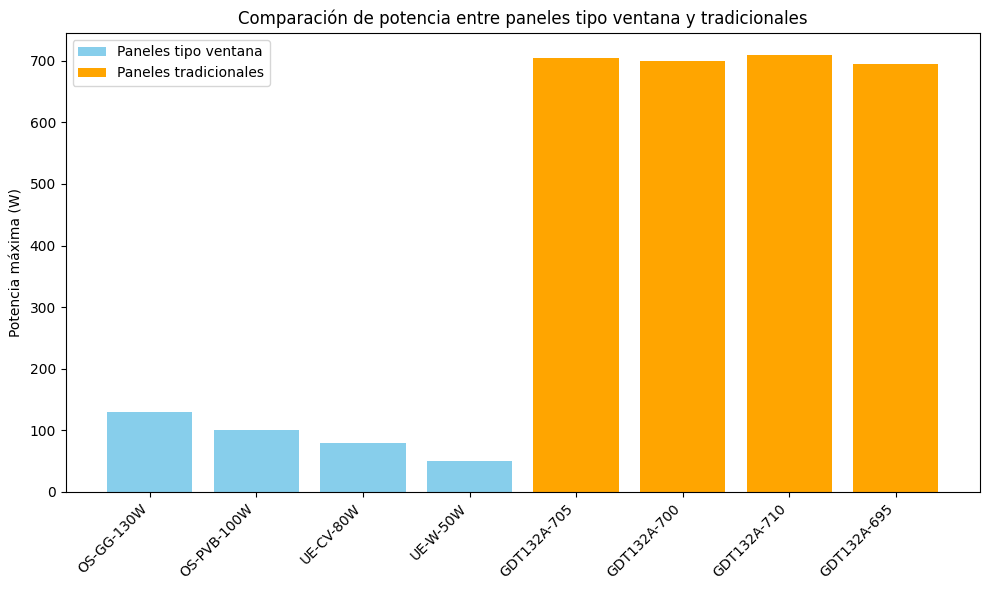

In [72]:
# Separar los datos por categoría
nombres_ventana = [p['model_name'] for p in paneles if p['category'] == 'ventana']
pmax_ventana = [p['pmax'] for p in paneles if p['category'] == 'ventana']

nombres_tradicional = [p['model_name'] for p in paneles if p['category'] == 'tradicional']
pmax_tradicional = [p['pmax'] for p in paneles if p['category'] == 'tradicional']

# Crear la gráfica
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar barras
ax.bar(nombres_ventana, pmax_ventana, color='skyblue', label='Paneles tipo ventana')
ax.bar(nombres_tradicional, pmax_tradicional, color='orange', label='Paneles tradicionales')

# Configuración de ejes y título
ax.set_ylabel('Potencia máxima (W)')
ax.set_title('Comparación de potencia entre paneles tipo ventana y tradicionales')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar la gráfica
plt.show()

Correlación entre Potencia Máxima y Eficiencia: 0.87


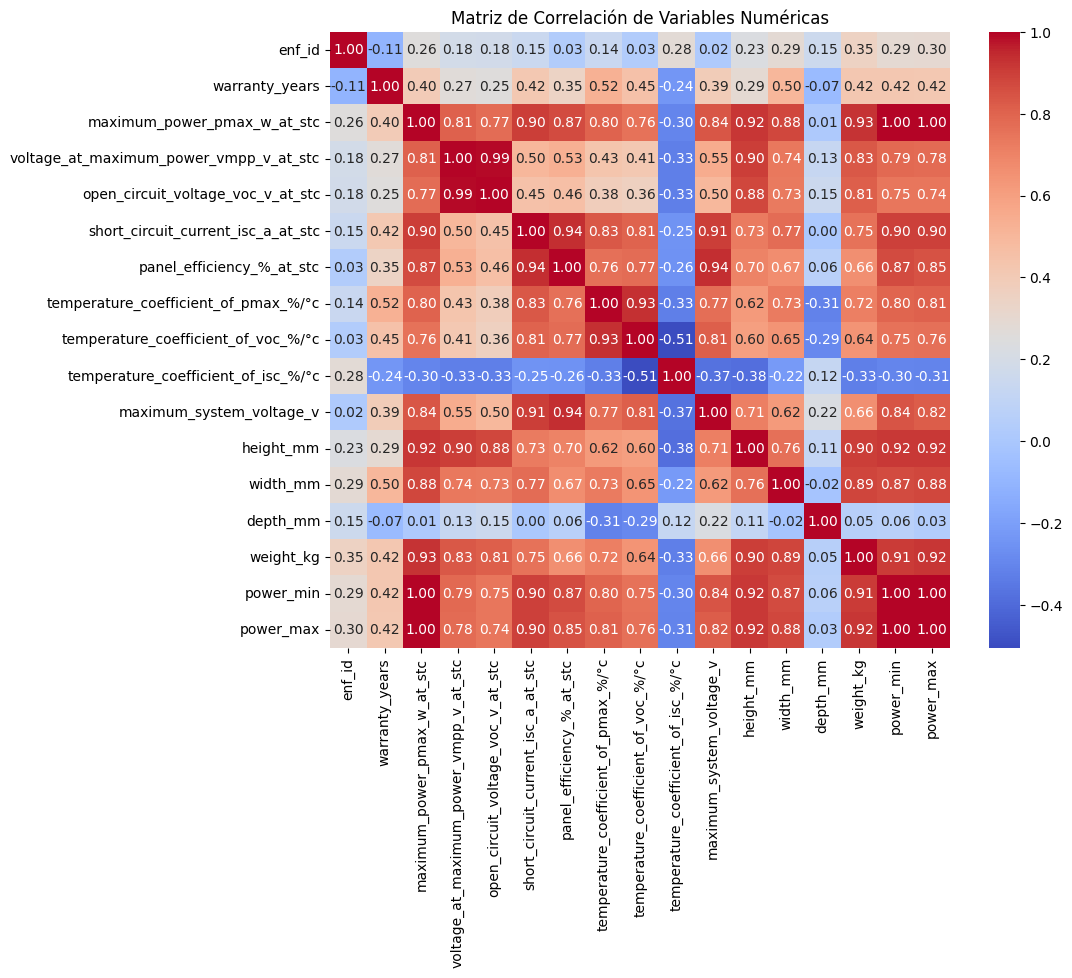

In [ ]:
# Correlación entre Potencia Máxima y Eficiencia
correlation = df_paneles['maximum_power_pmax_w_at_stc'].corr(df_paneles['panel_efficiency_%_at_stc'])
print(f"Correlación entre Potencia Máxima y Eficiencia: {correlation:.2f}")


# Matriz de Correlación (para columnas numéricas si hay más)
# Seleccionar solo columnas numéricas para la matriz de correlación
df_numeric = df_paneles.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

#Correlaciones - positivas
#power_max y power_min: 1.00 → Totalmente correlacionadas.
#weight_kg con power_min (0.93), power_max (0.92): paneles más potentes son más pesados.
#height_mm y maximum_system_voltage_v: 0.94 → paneles más altos tienden a soportar más voltaje.


#Programa con Gradio

In [71]:
# --- LIBRERÍAS ---
import pandas as pd
import numpy as np
import gradio as gr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



# Entrenar modelo de regresión
X = df[['Año', 'Numero_Mes', 'numero_clase_servicio']]
y = df['Tarifa_kWh']
modelo_tarifas = LinearRegression()
modelo_tarifas.fit(X, y)  # Usamos todos los datos para entrenar

# --- DATOS DE PANELES SOLARES ---
regiones_colombia = {
    'Caribe': 5.5,
    'Andina': 5.0,
    'Pacífica': 4.1,
    'Orinoquía': 5.0,
    'Amazonía': 4.3
}

# Datos de los paneles (extraídos de los dataframes ya creados)
paneles = []

# Agregar paneles tipo ventana
for index, row in paneles_tipo_ventana_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'ventana'
    })

# Agregar paneles tradicionales
for index, row in paneles_Fotovoltaicos_potentes.iterrows():
    paneles.append({
        'model_name': row['model_name'],
        'type': row['type'],
        'pmax': row['maximum_power_pmax_w_at_stc'],
        'category': 'tradicional'
    })


def calcular_produccion(pmax, hsp, perdidas=0.20):
    diario = (pmax/1000) * hsp * (1 - perdidas)
    mensual = diario * 30
    return mensual  # Retornamos producción mensual (kWh)

# --- FUNCIÓN PRINCIPAL INTEGRADA ---
def simular_ahorro(consumo_mes, año, mes, clase_servicio, region, modelo_panel, num_paneles):
    # 1. Predecir tarifa
    clase_codigo = servicio_a_codigo[clase_servicio]
    tarifa_pred = modelo_tarifas.predict([[año, mes, clase_codigo]])[0]

    # 2. Calcular producción solar
    panel = next(p for p in paneles if p['model_name'] == modelo_panel)
    hsp = regiones_colombia[region]
    produccion_mes = calcular_produccion(panel['pmax'], hsp) * num_paneles

    # 3. Comparar consumo vs producción
    ahorro = min(produccion_mes, consumo_mes) * tarifa_pred
    costo_sin_paneles = consumo_mes * tarifa_pred
    costo_con_paneles = max(0, consumo_mes - produccion_mes) * tarifa_pred

    # 4. Generar resultados
    return {
        "Producción solar (kWh/mes)": f"{produccion_mes:.2f}",
        "Tarifa estimada ($/kWh)": f"${tarifa_pred:.2f}",
        "Costo mensual sin paneles": f"${costo_sin_paneles:.2f}",
        "Costo mensual con paneles": f"${costo_con_paneles:.2f}",
        "Ahorro potencial": f"${ahorro:.2f}",
    }

# --- INTERFAZ GRADIO ---
opciones_paneles = [
    (f"{p['model_name']} ({p['category']})", p['model_name']) for p in paneles
]
opciones_clases = list(servicio_a_codigo.keys())

with gr.Blocks() as app:
    gr.Markdown("## 🌞 Simulador de Ahorro con Paneles Solares en Colombia")
    with gr.Row():
        consumo = gr.Number(label="Consumo mensual (kWh)", value=300)
        año = gr.Slider(2024, 2030, step=1, label="Año de predicción")
        mes = gr.Slider(1, 12, step=1, label="Mes")
    with gr.Row():
        clase = gr.Dropdown(opciones_clases, label="Clase de servicio")
        region = gr.Dropdown(list(regiones_colombia.keys()), label="Región")
    with gr.Row():
        modelo = gr.Dropdown(opciones_paneles, label="Modelo de panel")
        num_paneles = gr.Number(label="Número de paneles", value=1)

    boton = gr.Button("Calcular ahorro")
    resultados = gr.JSON(label="Resultados")

    boton.click(
        simular_ahorro,
        inputs=[consumo, año, mes, clase, region, modelo, num_paneles],
        outputs=resultados
    )

app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8a49cd1a48d09a792d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
